# 2015 US Mortality Data: Risk Factors for Suicide

### **Content**:
- Introduction
- Background
- Methods
- Findings
- Discussion
- Conclusion
- References

## Introduction

The value of life is priceless. However, each year, more than 40,000 people die by suicide in United States. Suicide is a major public health concern and is the 10th leading cause of death in the US.<sup>1</sup> 

Luckily, suicide is preventable. Knowing risk factors for suicide can help prevent suicide. Risk factors for suicide are those characteristics associated with suicide, characteristics that make it more likely that individuals will consider, attempt, or die by suicide. They might not be direct causes.<sup>2</sup>

This project explored single factor such as sex, age, marital status and the intersecting combination of them to see are those characteristics associated with suicide.

The hypothesis verified in the project includes:
- Are men more likely to suicide than women?
- Are teenagers more likely to suicide?
- Does marital status influence suicide?

Besides answering the questions above, I also found some interesting facts of the comprehensive effect of combination of single factors, such as :
- Men who are single are much more likely to suicide 
- Women who are widowed are less likely to suicide
- Young men are more likely to suicide
- Elder women are less likely to suicide.


## Background

Suicide is defined as death caused by self-directed injurious behavior with intent to die as a result of the behavior. Suicide is a major public health concern and it’s among the leading causes of death in the United States.<sup>3</sup>Risk factors for suicide are those characteristics associated with suicide, characteristics that increase the likelihood a individual will die by suicide. They might not be direct causes.<sup>2</sup>

Many researches have been done to explore the risk factors for suicide. Thoes researches stated some interesting conclusions including that men are more likely to suicide than women, teenagers are more likely to suicide, marital status and education can influence suicide etc. To verify those conclusions, this project explored single factor such as sex, age, marital status to see if they are associated with suicide. 

The hypothesis verified in the project includes:
- Are men more likely to suicide than women?
- Are teenagers more likely to suicide?
- Does marital status influence suicide?

Since the risk factors for suicide are complex, to have a deeper understanding for the risk factors, I also performed analysis on intersecting combinations of thoes single factors.  



## Methods

### Data

Data used in this project is 2015 US Mortality Data from [CDC’s National Vital Statistics Systems](https://www.cdc.gov/nchs/data_access/vitalstatsonline.htm#Mortality_Multiple). It's under [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/) license. The data includes 77 columns and 2,718,198 rows.


### Analytical Method

First, I performed a overall statistics analysis of the whole dataset to see how many death records do I have, and among those how many records are caused by suicide.

I extracted suicide records out as sub dataset then I respectively classified whole dataset and suicide sub dataset by sex, marital status, and age. For each factor, I analyzed the count distribution of that factor among suicides. To have a different view of the effect of the factor, I also calculated the suicide ratio of each group. It's defined by Count of Suicide of that group / Count of Total Death of that group * 100%. Suicide ratio is a clearer indicator to show which group are more likely to suicide and which group are not.

Since causes leading a human behavior are complex, we should also consider conprehensive effect of mixed factors besides of only considering effect of single factor in human-centered data science. Thus besides analyzing the effect of single factor, I also performed analysis on intersecting combinations of thoes single factors to figure out the comprehensive effect of mixed factors. The method is as similar as that of analyzing single factor.

## Findings


In [1]:
# import packages and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('2015_data.csv')
df_suicide = df[df['manner_of_death'] == 2]

/Users/becky/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (40,41,42,43,61,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.shape

(2718198, 77)

In [3]:
df_suicide.shape

(44417, 77)

In [4]:
df_suicide.shape[0]/df.shape[0] * 100

1.634060506261869

After loading the data, we can have a quick look at the data. In 2015 United States, there are 2,718,198 death record. Among them, 44417 died by suicide. That also means among all death, 1.63% died by suicide.

### Are men more likely suicide than women?

To answer this question, we can first have a look at the distribution of men and women among all people died by suicide in 2015, United States.

In [5]:
# suicide count by sex
sex_suicide = df_suicide.groupby(['sex'])['sex'].count()
sex_suicide

sex
F    10256
M    34161
Name: sex, dtype: int64

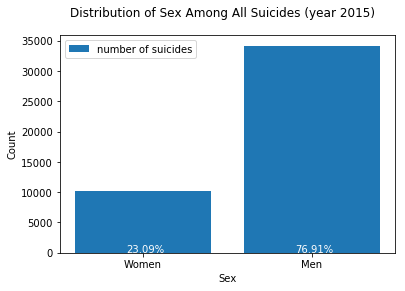

In [6]:
# plot distribution of sex among all suicides
x = np.arange(2)
fig, ax = plt.subplots()
fig.set_size_inches((6, 4))
plt.bar(x, sex_suicide.values, label = 'number of suicides')
for i, v in enumerate(sex_suicide / df_suicide.shape[0] * 100):
    ax.text(i - 0.1, v + 3, (str(round(v, 2)) + "%"), color='white')
plt.xticks(x, ['Women', 'Men'])
fig.suptitle('Distribution of Sex Among All Suicides (year 2015)')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
plt.legend()
plt.show()

From the numbers and chart above, we can see that among people died by suicide in 2015, United States, 10256 are women, 34161 are men. Men make up 76.92% of the total suicides, while women make up 23.09%. The number of men seems to be as more than three times as many as women. But we can't conclude that men are more likely to suicide than women because the total death of men and women may be different. To solve the problem, I calculated the suicide ratio of men and women. It's defined by Count of Suicide / Count of Total Death * 100%. The relationship between suicide ratio and sex is shown as follows: 

In [7]:
# suicide ratio by sex
sex_total = df.groupby(['sex'])['sex'].count()
sex_suicide_ratio = sex_suicide / sex_total * 100
sex_suicide_ratio

sex
F    0.764784
M    2.480531
Name: sex, dtype: float64

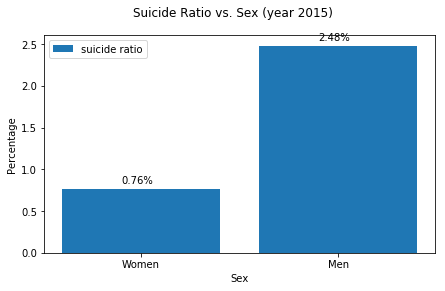

In [8]:
# plot suicide ratio vs. sex
x = np.arange(2)  
fig, ax = plt.subplots()
fig.set_size_inches((7, 4))
plt.bar(x,sex_suicide_ratio.values, label = 'suicide ratio')
for i, v in enumerate(sex_suicide_ratio):
    ax.text(i - 0.1, v + 0.07, (str(round(v, 2)) + "%"))
plt.xticks(x,['Women', 'Men'])
fig.suptitle('Suicide Ratio vs. Sex (year 2015)')
ax.set_xlabel('Sex')
ax.set_ylabel('Percentage')
plt.legend()
plt.show()

We can see from the numbers and chart above, the suicide ratio of men is more than three times as much as women. So **it's true that men overall are more likely to suicide than women**.

But why that happens? Are men easier to be impulsive? Are men faced at more pressure in sociaty than women? [Prof. Gopikrishna Deshpande](https://loop.frontiersin.org/people/75947/overview) and his team from Auburn University in USA found there are four traits defined as “the acquired capability for suicide” which men are more likely to have than women. The traits are fearlessness of death, pain tolerance, emotional stoicism and sensation seeking. People experiencing a desire to commit suicide will not do so without first losing their fear of dying and developing the necessary pain tolerance to endure making a lethal attempt.<sup>4</sup>

Here is the link of Prof. Gopikrishna Deshpande's full article : [A Neural Basis for the Acquired Capability for Suicide](https://www.frontiersin.org/articles/10.3389/fpsyt.2016.00125/full)


### Are teenagers more likely to suicide?

To answer this question, I explored the relationship between age and suicide. The count of each age group is shown below.

In [9]:
# suicide count by age
age_suicide = df_suicide.groupby(['age_recode_12'])['age_recode_12'].count()
age_suicide

age_recode_12
3      414
4     5506
5     6981
6     6966
7     8798
8     7779
9     4229
10    2505
11    1229
12      10
Name: age_recode_12, dtype: int64

The description of each code is as follows:

|  Code | Description |
|---| ---|
| 03  | 5 - 14 years old|
| 04  | 15 - 24 years old|
| 05  | 25 - 34 years old|
| 06  | 35 - 44 years old|
| 07  | 45 - 54 years old|
| 08  | 55 - 64 years old|
| 09  | 65 - 74 years old|
| 10  | 75 - 84 years old|
| 11  | 85 years old and over|
| 12  | Age not stated|

The distribution of age in all suicides is shown below:

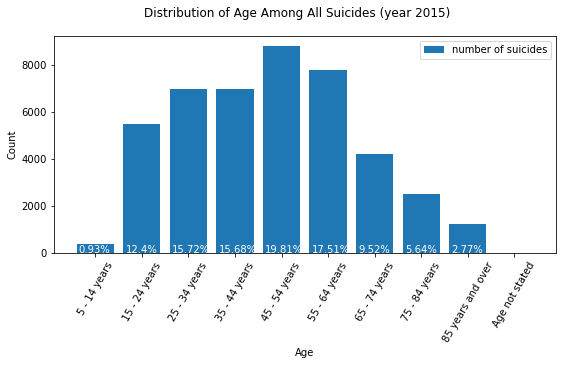

In [10]:
age_index = ['5 - 14 years', '15 - 24 years', '25 - 34 years',
             '35 - 44 years','45 - 54 years','55 - 64 years','65 - 74 years',
            '75 - 84 years', '85 years and over', 'Age not stated']
# plot distribution of age among all suicides
x = np.arange(10)
fig, ax = plt.subplots()
fig.set_size_inches((9, 4))
plt.bar(x, age_suicide.values, label = 'number of suicides')
for i, v in enumerate(age_suicide / df_suicide.shape[0] * 100):
    ax.text(i - 0.35, v, (str(round(v, 2)) + "%"), color='white')
plt.xticks(x, age_index, rotation = 60)
fig.suptitle('Distribution of Age Among All Suicides (year 2015)')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
plt.legend()
plt.show()

Among total suicides in 2015, age group of 45-54 years old has the largest count, which is 8798, accounting for 19.81% of the total suicides. While age group 5-14 years old has the smallest count, which is 414, accounting for 0.93% of the total suicides.

To compare the suicide situation of each age group, I also calculated the suicide ratio.

In [11]:
# suicide ratio by age
age_total = df.groupby(['age_recode_12'])['age_recode_12'].count()
age_suicide_ratio = age_suicide / age_total * 100
age_suicide_ratio = age_suicide_ratio[2:]
age_suicide_ratio

age_recode_12
3      7.590759
4     17.940697
5     13.478395
6      9.482970
7      5.022779
8      2.166949
9      0.852300
10     0.392371
11     0.142883
12     2.680965
Name: age_recode_12, dtype: float64

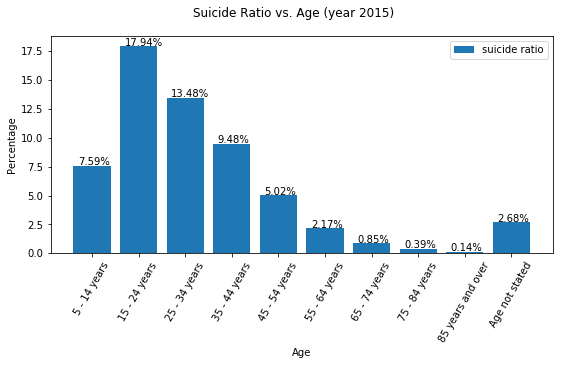

In [12]:
# plot suicide ratio vs. age
x = np.arange(10)
fig, ax = plt.subplots()
fig.set_size_inches((9, 4))
plt.bar(x, age_suicide_ratio.values, label = 'suicide ratio')
plt.xticks(x,age_index, rotation = 60)
for i, v in enumerate(age_suicide_ratio):
    ax.text(i - 0.3, v + 0.07, (str(round(v, 2)) + "%"))
fig.suptitle('Suicide Ratio vs. Age (year 2015)')
ax.set_xlabel('Age')
ax.set_ylabel('Percentage')
plt.legend()
plt.show()

As the chart shown above, distribution of suicide ratio is very different from the distribution of suicide count. We can see that age group of 15-24 years old has the highest suicide ratio of 17.94%, which means among total death of age 15-24, 17.94% died by suicide. While age group of 85+ years old has the lowest suicide ratio of 0.14%, which means among total death of age 85+, only 0.14% died by suicide. As age increases, the suicide ratio decreases. We can conclude that **young people around 20 years old are more likely to suicide**. 

### Does marital status influence suicide?

I used the same method to evaluate effect of marital status. The distribution of each matiral status group among all suicides is shown below:

In [13]:
# suicide count by marital status
marital_suicide = df_suicide.groupby(['marital_status'])['marital_status'].count()
marital_suicide

marital_status
D     9708
M    15388
S    16063
U      427
W     2831
Name: marital_status, dtype: int64

The description of each code is as follows:

|  Code | Description |
|---| ---|
| D  | Divorced|
| M  | Married|
| S  | Never married, single|
| U  | Marital Status unknown|
| W  | Widowed|

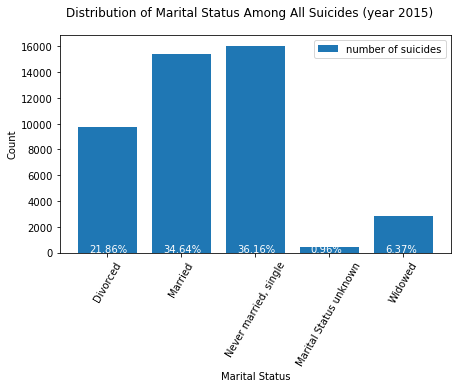

In [14]:
marital_index = ['Divorced', 'Married', 'Never married, single',
             'Marital Status unknown','Widowed']
# plot distribution of marital status among all suicides
x = np.arange(5)
fig, ax = plt.subplots()
fig.set_size_inches((7, 4))
plt.bar(x, marital_suicide.values, label = 'number of suicides')
for i, v in enumerate(marital_suicide / df_suicide.shape[0] * 100):
    ax.text(i - 0.25, v, (str(round(v, 2)) + "%"), color='white')
plt.xticks(x, marital_index, rotation = 60)
fig.suptitle('Distribution of Marital Status Among All Suicides (year 2015)')
ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')
plt.legend()
plt.show()

Among total suicides in 2015, the group of people who are single(never married) has the largest count of 16063, accounting for 36.16% of the total suicides. While the group of people who are widowed has the smallest count of 2831, accounting for 6.37% of the total suicides.

To compare the suicide situation of each age group, I also calculated the suicide ratio.

In [15]:
# suicide ratio by marital status
marital_total = df.groupby(['marital_status'])['marital_status'].count()
marital_suicide_ratio = marital_suicide / marital_total * 100
marital_suicide_ratio

marital_status
D    2.298900
M    1.534990
S    4.572146
U    2.123955
W    0.307050
Name: marital_status, dtype: float64

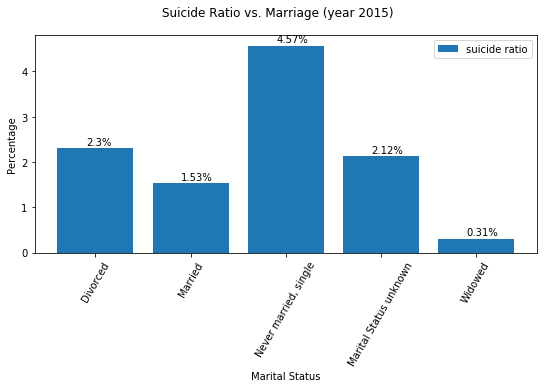

In [17]:
# plot suicide ratio vs. marital status
x = np.arange(5)
fig, ax = plt.subplots()
fig.set_size_inches((9, 4))
plt.bar(x, marital_suicide_ratio.values, label = 'suicide ratio')
plt.xticks(x,marital_index, rotation = 60)
for i, v in enumerate(marital_suicide_ratio):
    ax.text(i - 0.1, v + 0.07, (str(round(v, 2)) + "%"))
fig.suptitle('Suicide Ratio vs. Marriage (year 2015)')
ax.set_xlabel('Marital Status')
ax.set_ylabel('Percentage')
plt.legend()
plt.show()

As the chart shown above, distribution of suicide ratio is different from the distribution of suicide count. We can see that the group of people who are single(never married) has the highest suicide ratio of 4.57%, which means among total death people who are single, 4.57% died by suicide. While the group of people who are widowed has the lowest suicide ratio of 0.31%%, which means among total death people who are widowed, only 0.31% died by suicide. We can conclude that **people who are single(never married) are more likely to suicide then people who are divoced, married or widowed**.

### Comprehensive Effect of Sex and Marital Status

To have a deeper understanding for the risk factors, I also performed analysis on intersecting combinations of thoes single factors. Here shows the comprehensive effect of sex and marital status.

In [18]:
sex_marital_suicide = df_suicide.groupby(['marital_status', 'sex'])['sex'].count()
sex_marital_total = df.groupby(['marital_status', 'sex'])['sex'].count()

In [19]:
# Sex Distribution over Marital Status Among all Suicides
sex_marital_suicide_distribution = sex_marital_suicide / sex_suicide * 100
sex_marital_suicide_distribution

marital_status  sex
D               F      26.560062
                M      20.444366
M               F      34.652886
                M      34.641843
S               F      29.943448
                M      38.031674
U               F       0.731279
                M       1.030415
W               F       8.112324
                M       5.851702
Name: sex, dtype: float64

In [20]:
women = []
men = []
for i in range(len(sex_marital_suicide_distribution.values)):
    if i % 2 == 0:
        women.append(sex_marital_suicide_distribution.values[i])
    else:
        men.append(sex_marital_suicide_distribution.values[i])

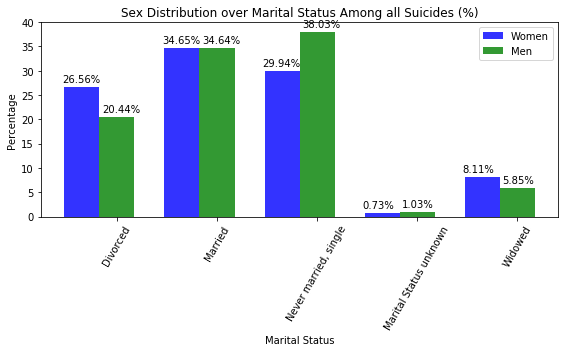

In [21]:
# create plot
n_groups = 5
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, women, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Women')
 
rects2 = plt.bar(index + bar_width, men, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Men')
for i in range(n_groups):
    ax.text(index[i] - 0.2, women[i] + 1, (str(round(women[i], 2)) + "%"))
    ax.text(index[i] + 0.2, men[i] + 1, (str(round(men[i], 2)) + "%"))
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.title('Sex Distribution over Marital Status Among all Suicides (%)')
plt.xticks(index + bar_width, marital_index, rotation = 60)
plt.legend()
 
plt.tight_layout()
plt.show()

Among all suicides, 26.56% of women are divorced, 34.65% are married, 29.94% are single and 8.11% are widowed, while 20.44% of men are divorced, 34.64% are married, 38.03 are single and 5.85% are widowed. This means that among all suicides, men and women who are married have similar percentage, women who are divorced or widowed are more than men who are also dicorced or widowed, women who are single are less than men who are also single.

To explor the relationship in another view, I plot the suicide ratio distribution over marital status and sex.

In [22]:
# Distribution of Suicide Ratio over Sex and Marital Status
sex_marital_ratio_distribution = sex_marital_suicide / sex_marital_total * 100
sex_marital_ratio_distribution

marital_status  sex
D               F      1.367237
                M      3.131066
M               F      1.072925
                M      1.763011
S               F      2.309943
                M      5.949372
U               F      1.315097
                M      2.444275
W               F      0.123827
                M      0.799296
Name: sex, dtype: float64

In [23]:
women_ratio = []
men_ratio = []
for i in range(len(sex_marital_ratio_distribution.values)):
    if i % 2 == 0:
        women_ratio.append(sex_marital_ratio_distribution.values[i])
    else:
        men_ratio.append(sex_marital_ratio_distribution.values[i])

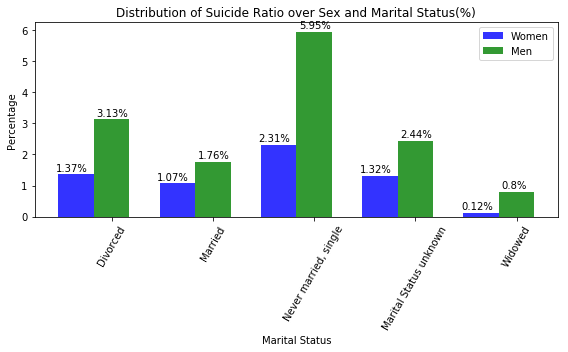

In [24]:
# create plot
n_groups = 5
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, women_ratio, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Women')
 
rects2 = plt.bar(index + bar_width, men_ratio, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Men')
for i in range(n_groups):
    ax.text(index[i] - 0.2, women_ratio[i] + 0.1, (str(round(women_ratio[i], 2)) + "%"))
    ax.text(index[i] + 0.2, men_ratio[i] + 0.1, (str(round(men_ratio[i], 2)) + "%"))
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.title('Distribution of Suicide Ratio over Sex and Marital Status(%)')
plt.xticks(index + bar_width, marital_index, rotation = 60)
plt.legend()
 
plt.tight_layout()
plt.show()

In the visualization above, despite of unknown marital status groups, people are classified into 8 groups, men who are divoced, women who are divoced, men who are married, women who are married, men who are single, women who are single, men who are widowed, and women who are widowed. Among them, the group of men who are single has the highest suicide ratio of 5.95%, that means among all death who are men and single, 5.95% died by suicide. While the group of women who are widowed has the lowest suicide ratio of 0.12%, that means among all death who are women and widowed, only 0.12% died by suicide. 

Thus, we can conclude that men over each matital status have a higher suicide ratio than women. Besides that men who are single are much more likely to suicide. Women who are widowed are less likely to suicide.



### Comprehensive Effect of Sex and Age

Here I classified age groups into 4 new groups. Age between 5-34 is definded to be "young", age between 35-64 is definded to be "mid aged", age between 65+ are defined to be "elder", other age and unknown age are definded to be "other".

In [25]:
#  classify age groups into 4 new groups
age_group = []
for code in df['age_recode_12']:
    if code in [3, 4, 5]:
        age_group.append('young')
    elif code in [6, 7, 8]:
        age_group.append('mid aged')
    elif code in [9, 10, 11]:
        age_group.append('elder')
    else:
        age_group.append('other')


In [26]:
df['age_group'] = age_group
df_suicide = df[df['manner_of_death'] == 2]
sex_age_total = df.groupby(['age_group', 'sex'])['sex'].count()
sex_age_suicide = df_suicide.groupby(['age_group', 'sex'])['sex'].count()

In [27]:
# Sex Distribution over Age Among all Suicides
sex_age_suicide_distribution = sex_age_suicide / sex_suicide * 100
sex_age_suicide_distribution

age_group  sex
elder      F      13.494540
           M      19.258804
mid aged   F      59.682137
           M      50.999678
other      F       0.029251
           M       0.020491
young      F      26.794072
           M      29.721027
Name: sex, dtype: float64

In [28]:
women = []
men = []
for i in range(len(sex_age_suicide_distribution.values)):
    if i % 2 == 0:
        women.append(sex_age_suicide_distribution.values[i])
    else:
        men.append(sex_age_suicide_distribution.values[i])

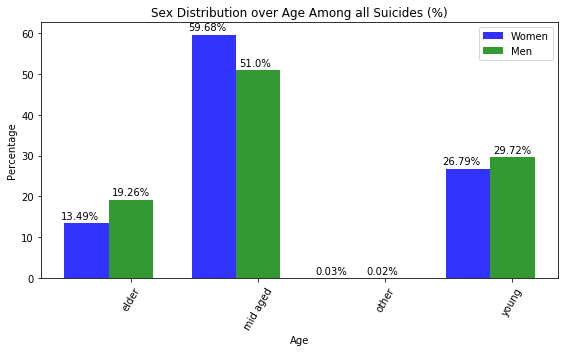

In [31]:
# create plot
age_group_index = ['elder', 'mid aged', 'other', 'young']
n_groups = 4
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, women, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Women')
 
rects2 = plt.bar(index + bar_width, men, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Men')
for i in range(n_groups):
    ax.text(index[i] - 0.2, women[i] + 1, (str(round(women[i], 2)) + "%"))
    ax.text(index[i] + 0.2, men[i] + 1, (str(round(men[i], 2)) + "%"))
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Sex Distribution over Age Among all Suicides (%)')
plt.xticks(index + bar_width, age_group_index, rotation = 60)
plt.legend()
 
plt.tight_layout()
plt.show()

Among all suicides in 2015, 13.49% of women are elder, 59.68% are mid aged, 26.79% are young, while 19.26% of men are elder, 51.0% are mid-aged, 29.72% are young. This means that among all suicides in 2015, women who are elder are less than men who are also elder, women who are mid-aged are more than men who are also mid-aged, women who are young are less than men who are young.

To explor the relationship in another view, I plot the suicide ratio distribution over age and sex.

In [32]:
# Distribution of Suicide Ratio over Sex and Age
sex_age_ratio_distribution = sex_age_suicide / sex_age_total * 100
sex_age_ratio_distribution

age_group  sex
elder      F       0.129908
           M       0.707884
mid aged   F       2.581480
           M       4.702396
other      F       0.024436
           M       0.044811
young      F      10.458611
           M      16.465303
Name: sex, dtype: float64

In [33]:
women_ratio = []
men_ratio = []
for i in range(len(sex_age_ratio_distribution.values)):
    if i % 2 == 0:
        women_ratio.append(sex_age_ratio_distribution.values[i])
    else:
        men_ratio.append(sex_age_ratio_distribution.values[i])

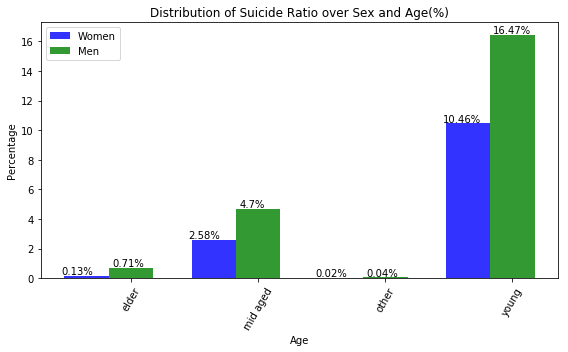

In [34]:
# creat plot
n_groups = 4
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, women_ratio, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Women')
 
rects2 = plt.bar(index + bar_width, men_ratio, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Men')
for i in range(n_groups):
    ax.text(index[i] - 0.2, women_ratio[i] + 0.1, (str(round(women_ratio[i], 2)) + "%"))
    ax.text(index[i] + 0.2, men_ratio[i] + 0.1, (str(round(men_ratio[i], 2)) + "%"))
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Distribution of Suicide Ratio over Sex and Age(%)')
plt.xticks(index + bar_width, age_group_index, rotation = 60)
plt.legend()
 
plt.tight_layout()
plt.show()

In the visualization above, despite of other age group, people are classified into 6 groups, men who are young, women who are young, men who are mid aged, women who are mid aged, men who are elder, women who are elder. Among them, the group of men who are young has the highest suicide ratio of 16.47%, that means among all death who are men and young, 16.47% died by suicide. While the group of women who are elder has the lowest suicide ratio of 0.13%, that means among all death who are women and elder, only 0.13% died by suicide. 

We can conclude that men of each age group have a higher suicide ratio than women, men who are young are more likely to suicide, women who are older are less likely to suicide.

## Discussion

### Limitations:

The project also has some limitations:

First, risk factors for suicide are complex. However, US Mortality data doesn’t provide information such as mental illness, family history of suicide, previous suicide attempt(s), other social factors etc. that may associated with suicide.

Second, there's only one year’s data, and the location is limited to United States. Data bias may exist. Situations in other years or in other countries may be different.

### Why is this research important?

The value of life is priceless, everyone should cherish life. However, each year, more than 40,000 people die by suicide in United States. Suicide is a major public health concern and is the 10th leading cause of death in the US.
Luckily, suicide is preventable. Knowing risk factors for suicide can help prevent suicide.

In the conclusions of this research, groups of some specific characteristics show a higher likelihood to suicide, such as sex of men, age of young, marital status of single as well as men who are young, men who are single, compared to other groups. What is found in this research can help people pay much more attention on groups who have these characteristics, which can help to prevent suicide more effeciently.


### Future Work:

In the future, I'll analyzed other factors such as:
- Education
- Place where suicide occures
- Time when suicide occures
- Suicide methods

Also, the effect of intersecting combination of thoes single factors will be studied.


## Conclusion

This project explored single factor such as sex, age, marital status and the intersecting combination of them to see are those characteristics associated with suicide.

The hypothesis verified in the project includes:
- Are men more likely to suicide than women?
- Are teenagers more likely to suicide?
- Does marital status influence suicide?

The answers are yes to all questions above.

Besides that, I also found some interesting facts of the comprehensive effect of combination of single factors, such as :
- Men who are single are much more likely to suicide 
- Women who are widowed are less likely to suicide
- Young men are more likely to suicide
- Elder women are less likely to suicide.

Since causes leading a human behavior are complex, we should also consider conprehensive effect of mixed factors besides of only considering effect of single factor in human-centered data science. This project informs readers the understanding of human-centered data science by illustrating how to perform analysis on conprehensive effect of mixed factors. Also this project has considered human-centered aspects such as data license, data reproducibility and research limitations. 

## References


1.Suicide Statistics — AFSP : https://afsp.org/about-suicide/suicide-statistics/

2.CDC/National Center for Health Statistics: https://www.cdc.gov/violenceprevention/suicide/riskprotectivefactors.html

3.National Institutes of Health: https://www.nimh.nih.gov/health/statistics/suicide/index.shtml

4.Why do more men commit suicide than women? : https://blog.frontiersin.org/2016/09/26/why-do-more-men-commit-suicide-than-women/
